<a href="https://colab.research.google.com/github/jhcool1988/teamdata/blob/master/DNN_marketvalueprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MNIST 데이터 관련 import
from keras.datasets import mnist                  # MNIST 데이터 Loader
from keras.utils.np_utils import to_categorical   # One-hot 포맷 변환
import numpy as np                                # float type casting
import matplotlib.pyplot as plt

# Feature scaling 관련 import
from sklearn.preprocessing import minmax_scale    # [0-1] Scaling

# Model 구축 관련 import
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jhcool1988/teamdata/master/soccer-sid.csv')
df.head()

,playername,marketvaluepound,season,age,lgrank,MP,starts,min,goal,assist,sh,sot,sotp,gsh,cmp,cmpp,cmpsp,cmpmp,cmplp,crs,ground,low,high,left,right,head,off,int,block,sca,passlive,drib,gca,gcapasslive,gcadrib,tkl,tklw,press,pressp,touches,succp,targ,rec,recp,miscon,subs,fls,recov,aerialwonp
0,Tammy Abraham,NaN,2015-2016,17,10th,2,0,55,0,0,35.0,0.0,8.0,0.30,368,73.0,36.0,79.0,59.0,26,320,85,86,130,311,24,2,11,Matches,40,28,3,5,3,1,17,11,269,25.0,672,56.0,681,484,69.0,32,2,2,89,35.0
1,Tammy Abraham,7200000.0,2016-2017,18,17th,41,40,"3,414",23,3,0.0,40.0,8.0,0.30,368,73.0,36.0,79.0,59.0,0,320,85,86,130,311,24,2,11,Matches,40,28,3,5,3,1,17,0,269,25.0,672,56.0,681,484,69.0,32,1,45,89,35.0
2,Tammy Abraham,9000000.0,2017-2018,19,18th,31,15,"1,726",5,1,43.0,14.0,32.6,0.12,208,67.3,33.3,74.2,52.2,13,202,49,58,24,222,35,0,11,Matches,31,20,6,2,1,0,11,5,178,32.6,535,57.8,691,392,56.7,60,16,15,61,50.0
3,Tammy Abraham,13500000.0,2018-2019,20,6th,1,1,90,0,0,35.0,7.0,8.0,0.30,368,73.0,36.0,79.0,59.0,26,320,85,86,130,311,24,2,11,Matches,40,28,3,5,3,1,17,11,269,25.0,672,56.0,681,484,69.0,32,0,22,89,35.0
4,Tammy Abraham,18000000.0,2018-2019,20,5th,37,37,"3,138",25,3,107.0,58.0,54.2,0.19,368,73.0,36.0,79.0,59.0,19,320,85,86,130,311,24,2,11,Matches,40,28,3,5,3,1,17,6,269,25.0,672,56.0,681,484,69.0,32,0,30,89,35.0


In [ ]:
df = df[['cmpsp']]
df

,cmpsp
0,36.0
1,36.0
2,33.3
3,36.0
4,36.0
...,...
6250,36.0
6251,36.0
6252,36.0
6253,36.0


In [ ]:
df.shape[0]

6255

In [ ]:
from sklearn.model_selection import train_test_split

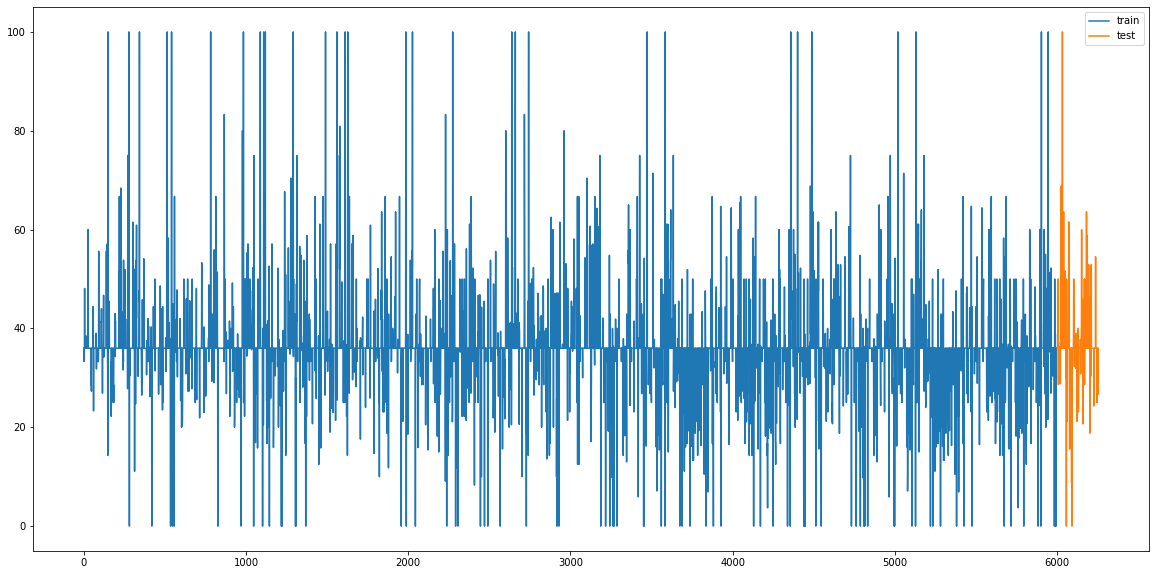

In [ ]:
train = df.loc[:6000]
test = df.loc[6000:6255]

ax = train.plot()
test.plot(ax=ax, figsize=(20,10))
plt.legend(['train', 'test'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

array([[0.36 ],
       [0.36 ],
       [0.333],
       ...,
       [0.36 ],
       [0.36 ],
       [0.36 ]])

In [ ]:
train = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train.head()

,Scaled
0,0.360
1,0.360
2,0.333
3,0.360
4,0.360


In [ ]:
for s in range(1, 11):
    train['shift_{}'.format(s)] = train['Scaled'].shift(s)
    test['shift_{}'.format(s)] = test['Scaled'].shift(s)

train

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10
0,0.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.360,0.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.333,0.360,0.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.360,0.333,0.360,0.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.360,0.360,0.333,0.36,0.36,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5996,0.360,0.300,0.360,0.36,0.00,0.36,0.00,0.389,0.229,0.360,0.360
5997,0.360,0.360,0.300,0.36,0.36,0.00,0.36,0.000,0.389,0.229,0.360
5998,0.360,0.360,0.360,0.30,0.36,0.36,0.00,0.360,0.000,0.389,0.229
5999,0.360,0.360,0.360,0.36,0.30,0.36,0.36,0.000,0.360,0.000,0.389


In [ ]:
for s in range(1, 11):
    train['shift_{}'.format(s)] = train['Scaled'].shift(s)
    test['shift_{}'.format(s)] = test['Scaled'].shift(s)

train

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10
0,0.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.360,0.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.333,0.360,0.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.360,0.333,0.360,0.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.360,0.360,0.333,0.36,0.36,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5996,0.360,0.300,0.360,0.36,0.00,0.36,0.00,0.389,0.229,0.360,0.360
5997,0.360,0.360,0.300,0.36,0.36,0.00,0.36,0.000,0.389,0.229,0.360
5998,0.360,0.360,0.360,0.30,0.36,0.36,0.00,0.360,0.000,0.389,0.229
5999,0.360,0.360,0.360,0.36,0.30,0.36,0.36,0.000,0.360,0.000,0.389


In [ ]:
X_train = train.dropna().drop('Scaled', axis=1)
y_train = train.dropna()[['Scaled']]

X_test = test.dropna().drop('Scaled', axis=1)
y_test = test.dropna()[['Scaled']]

In [ ]:
X_train = np.array(X_train)
X_test= np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(X_train)
print(y_train.shape)
print(y_train)

(5991, 10)
[[0.36  0.36  0.36  ... 0.333 0.36  0.36 ]
 [0.36  0.36  0.36  ... 0.36  0.333 0.36 ]
 [0.36  0.36  0.36  ... 0.36  0.36  0.333]
 ...
 [0.36  0.36  0.3   ... 0.    0.389 0.229]
 [0.36  0.36  0.36  ... 0.36  0.    0.389]
 [0.36  0.36  0.36  ... 0.    0.36  0.   ]]
(5991, 1)
[[0.36]
 [0.36]
 [0.36]
 ...
 [0.36]
 [0.36]
 [0.36]]


In [ ]:
X_train_t = X_train.reshape(X_train.shape[0], 10, 1)
X_test_t = X_test.reshape(X_test.shape[0], 10, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)


최종 DATA
(5991, 10, 1)
[[[0.36 ]
  [0.36 ]
  [0.36 ]
  ...
  [0.333]
  [0.36 ]
  [0.36 ]]

 [[0.36 ]
  [0.36 ]
  [0.36 ]
  ...
  [0.36 ]
  [0.333]
  [0.36 ]]

 [[0.36 ]
  [0.36 ]
  [0.36 ]
  ...
  [0.36 ]
  [0.36 ]
  [0.333]]

 ...

 [[0.36 ]
  [0.36 ]
  [0.3  ]
  ...
  [0.   ]
  [0.389]
  [0.229]]

 [[0.36 ]
  [0.36 ]
  [0.36 ]
  ...
  [0.36 ]
  [0.   ]
  [0.389]]

 [[0.36 ]
  [0.36 ]
  [0.36 ]
  ...
  [0.   ]
  [0.36 ]
  [0.   ]]]
[[0.36]
 [0.36]
 [0.36]
 ...
 [0.36]
 [0.36]
 [0.36]]


In [ ]:
# X_train, X_test, y_train, y_test = \
#                      train_test_split(df['sotp'], df['cmpp'],
#                      train_size=0.7, test_size=0.3)

TypeError: ignored

In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0.36  0.36  0.36  ... 0.333 0.36  0.36 ]
 [0.36  0.36  0.36  ... 0.36  0.333 0.36 ]
 [0.36  0.36  0.36  ... 0.36  0.36  0.333]
 ...
 [0.36  0.36  0.36  ... 0.24  0.397 0.36 ]
 [0.292 0.36  0.36  ... 0.448 0.24  0.397]
 [0.324 0.292 0.36  ... 0.36  0.448 0.24 ]]
[[0.36  0.36  0.309 ... 0.36  0.36  0.36 ]
 [0.36  0.36  0.36  ... 0.36  0.36  0.36 ]
 [0.36  0.36  0.36  ... 0.36  0.36  0.36 ]
 ...
 [0.36  0.36  0.36  ... 0.36  0.36  0.36 ]
 [0.36  0.36  0.36  ... 0.36  0.36  0.36 ]
 [0.36  0.36  0.36  ... 0.25  0.36  0.36 ]]
[[0.36 ]
 [0.36 ]
 [0.36 ]
 ...
 [0.292]
 [0.324]
 [0.36 ]]
[[0.36 ]
 [0.36 ]
 [0.455]
 ...
 [0.36 ]
 [0.36 ]
 [0.267]]


In [ ]:
# X_train = minmax_scale(X_train, feature_range=(0, 1), axis=0)
# X_test = minmax_scale(X_test, feature_range=(0, 1), axis=0)

In [ ]:
# 데이터 Load 및 전처리 과정

# Train, Test 데이터 Load
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

# Train 데이터 포맷 변환
# 60000(Train Sample 수) * 28(가로) * 28(세로) 포맷을
# 60000(Train Sample 수) * 784(= 28 * 28) 포맷으로 수정
num_of_train_samples = X_train.shape[0]                     # Train Sample 수
width = X_train.shape[1]                                    # 가로 길이
height = X_train.shape[2]                                   # 세로 길이
X_train = X_train.reshape(num_of_train_samples, width * height)

# Test 데이터 포맷 변환
# width, height는 Train 데이터와 같으므로 재사용
# 10000(Test Sample 수) * 28(가로) * 28(세로) 포맷을
# 10000(Test Sample 수) * 784(= 28 * 28) 포맷으로 수정
num_of_test_samples = X_test.shape[0]  # Sample 수
X_test = X_test.reshape(num_of_test_samples, width * height)

# Feature Scaling
# X_train의 각 원소는 0-255 사이의 값을 가지고 있다
# Overfitting 방지 및 Cost 함수의 빠른 수렴을 위해서 
# Feature Scaling 작업을 한다.
# 예제에서는 0-255 범위를 0-1 범위로 Scaling
# 참고: https://en.wikipedia.org/wiki/Feature_scaling

# 나누기 연산이 들어가므로 uint8을 float64로 변환한다
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

# 간단한 방법은 MNIST가 0-255 사이 값만을 가진다는 것을 알기 때문에
# 단순히 255를 나눠도 Feature Scaling이 가능하다.
# X_train = X_train / 255.0
# X_test = X_test / 255.0

# 아래 방법은 다소 복잡하지만 다른 데이터에서도 동일하게 적용할 수 있음
# Sample by featre matrix 형태이므로 axis=0로 설정
# axis=1은 축을 바꿔서 scaling, 자세한 내용은 scikit 문서 참조
X_train = minmax_scale(X_train, feature_range=(0, 1), axis=0)
X_test = minmax_scale(X_test, feature_range=(0, 1), axis=0)

# Lable의 categorical 값을 One-hot 형태로 변환
# 예를 들어 [1, 3, 2, 0] 를
# [[ 0.,  1.,  0.,  0.],
#  [ 0.,  0.,  0.,  1.],
#  [ 0.,  0.,  1.,  0.],
#  [ 1.,  0.,  0.,  0.]]
# 로 변환하는 것을 One-hot 형태라고 함
# MNIST Label인 0 ~ 9사이의 10가지 값을 변환한다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

NameError: ignored

In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0.36  0.36  0.447 ... 0.333 0.36  0.36 ]
 [0.36  0.36  0.36  ... 0.36  0.333 0.36 ]
 [0.36  0.36  0.36  ... 0.36  0.36  0.333]
 ...
 [0.36  0.36  0.36  ... 0.36  0.419 0.389]
 [0.292 0.36  0.36  ... 0.36  0.36  0.419]
 [0.324 0.292 0.36  ... 0.36  0.36  0.36 ]]
[[0.31  0.315 0.22  ... 0.36  0.36  0.36 ]
 [0.36  0.31  0.315 ... 0.36  0.36  0.36 ]
 [0.36  0.36  0.31  ... 0.36  0.36  0.36 ]
 ...
 [0.36  0.36  0.36  ... 0.36  0.36  0.36 ]
 [0.36  0.36  0.36  ... 0.36  0.36  0.36 ]
 [0.36  0.36  0.36  ... 0.356 0.36  0.36 ]]
[[0.36 ]
 [0.36 ]
 [0.36 ]
 ...
 [0.292]
 [0.324]
 [0.36 ]]
[[0.36 ]
 [0.36 ]
 [0.5  ]
 ...
 [0.36 ]
 [0.36 ]
 [0.267]]


In [ ]:
# Multilayer Perceptron (MLP) 생성

model = Sequential()

# Dense(256)의 의미는 256개의 hidden unit을 가지는 fully connected layer
# keras에서는 첫 번째 Layer, 즉 input layer의 input dimension만 지정하면
# 뒤의 연결되는 Layer의 dimension은 간단하게 작성 가능하다.

# width * height = 784인 dimension
# glorot_uniform == Xavier Initialization, keras에서는 내부적으로 이미 제공
# 그 외 he_uniform 등도 이미 구현되어있다.

# 첫 번째 Layer (Input layer)
model.add(Dense(64, input_dim=10, kernel_initializer='glorot_normal', activation='elu'))
model.add(Dropout(0.3))        # 30% 정도를 Drop

# 두 번째 Layer (Hidden layer 1)
# 두 번째 Layer부터는 output_dim만 설정하면 된다
# input_dim은 이전 레이어의 output_dim과 같다고 가정함
model.add(Dense(32, kernel_initializer='glorot_normal', activation='elu'))
model.add(Dropout(0.3))

# 세 번째 Layer (Hidden layer 2)
model.add(Dense(32, kernel_initializer='glorot_normal', activation='elu'))
model.add(Dropout(0.3))

# 네 번째 Layer (Hidden layer 3)
model.add(Dense(32, kernel_initializer='glorot_normal', activation='elu'))
model.add(Dropout(0.3))

# 다섯 번째 Layer (Output layer)
# Output layer는 softmax activation function
number_of_class = 32  # MNIST 예제는 10가지의 Category를 가지고 있다.
model.add(Dense(number_of_class, activation='elu'))  

# Cost function 및 Optimizer 설정
# Multiclass 분류이므로 Cross-entropy 사용
# Adam optimizer 사용
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# model training
training_epochs = 100
batch_size = 10
model.fit(X_train, y_train, epochs=training_epochs, batch_size=batch_size)

# Model evaluation using test set
print('모델 평가')
evaluation = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Accuracy: ' + str(evaluation[1]))

Epoch 1/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0238 - accuracy: 5.0075e-04
Epoch 2/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0106 - accuracy: 6.6767e-04
Epoch 3/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0095 - accuracy: 1.6692e-04
Epoch 4/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0091 - accuracy: 3.3383e-04
Epoch 5/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0090 - accuracy: 8.3459e-04
Epoch 6/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0089 - accuracy: 5.0075e-04
Epoch 7/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0088 - accuracy: 8.3459e-04
Epoch 8/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0088 - accuracy: 6.6767e-04
Epoch 9/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0087 - accuracy: 0.0012
Epoch 10/100
600/600 [==============================] - 1s 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

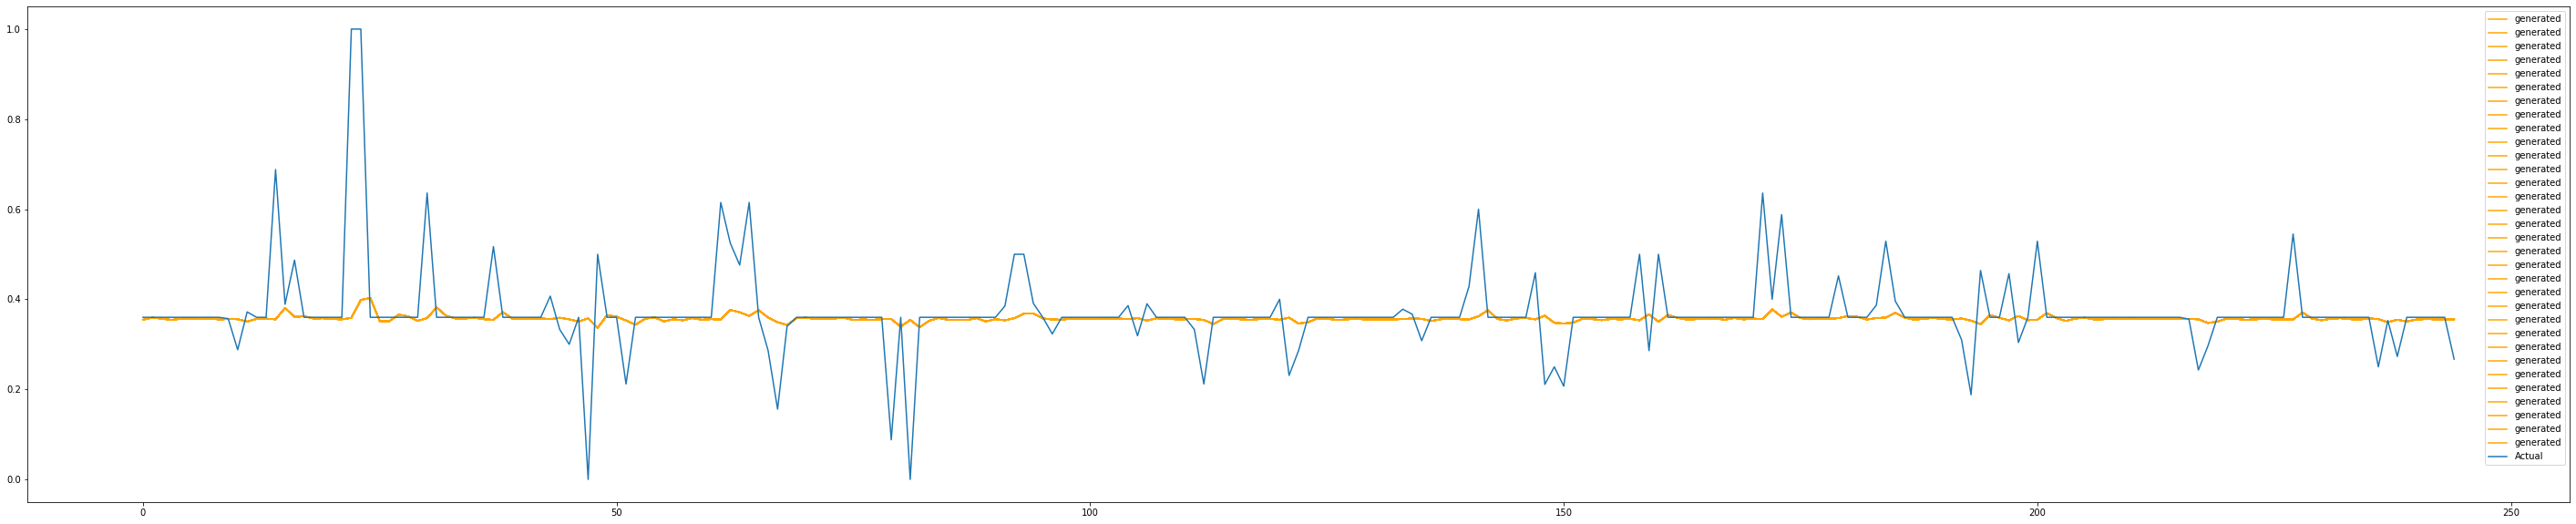

In [ ]:
preds = model.predict(X_test)
plt.figure(figsize=(50,10))
plt.plot(preds,
        label='generated',
        color='orange')
plt.plot(y_test,
        label='Actual')
plt.legend()
plt.show()